# Домашнє завдання 5

In [120]:
import numpy as np
import pandas as pd
import os
import shutil
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, roc_auc_score

from sklearn.metrics import confusion_matrix

%matplotlib inline

## Отримуємо датасет

копіюємо архів `homework.zip` в Google ![output.png](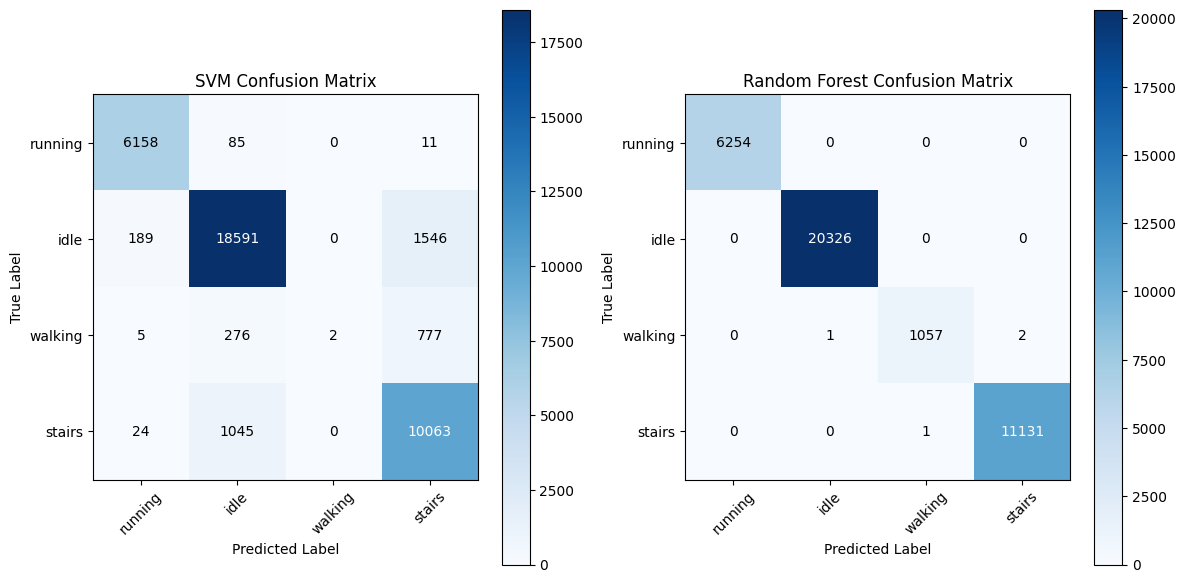![obsidian_dark.jpeg](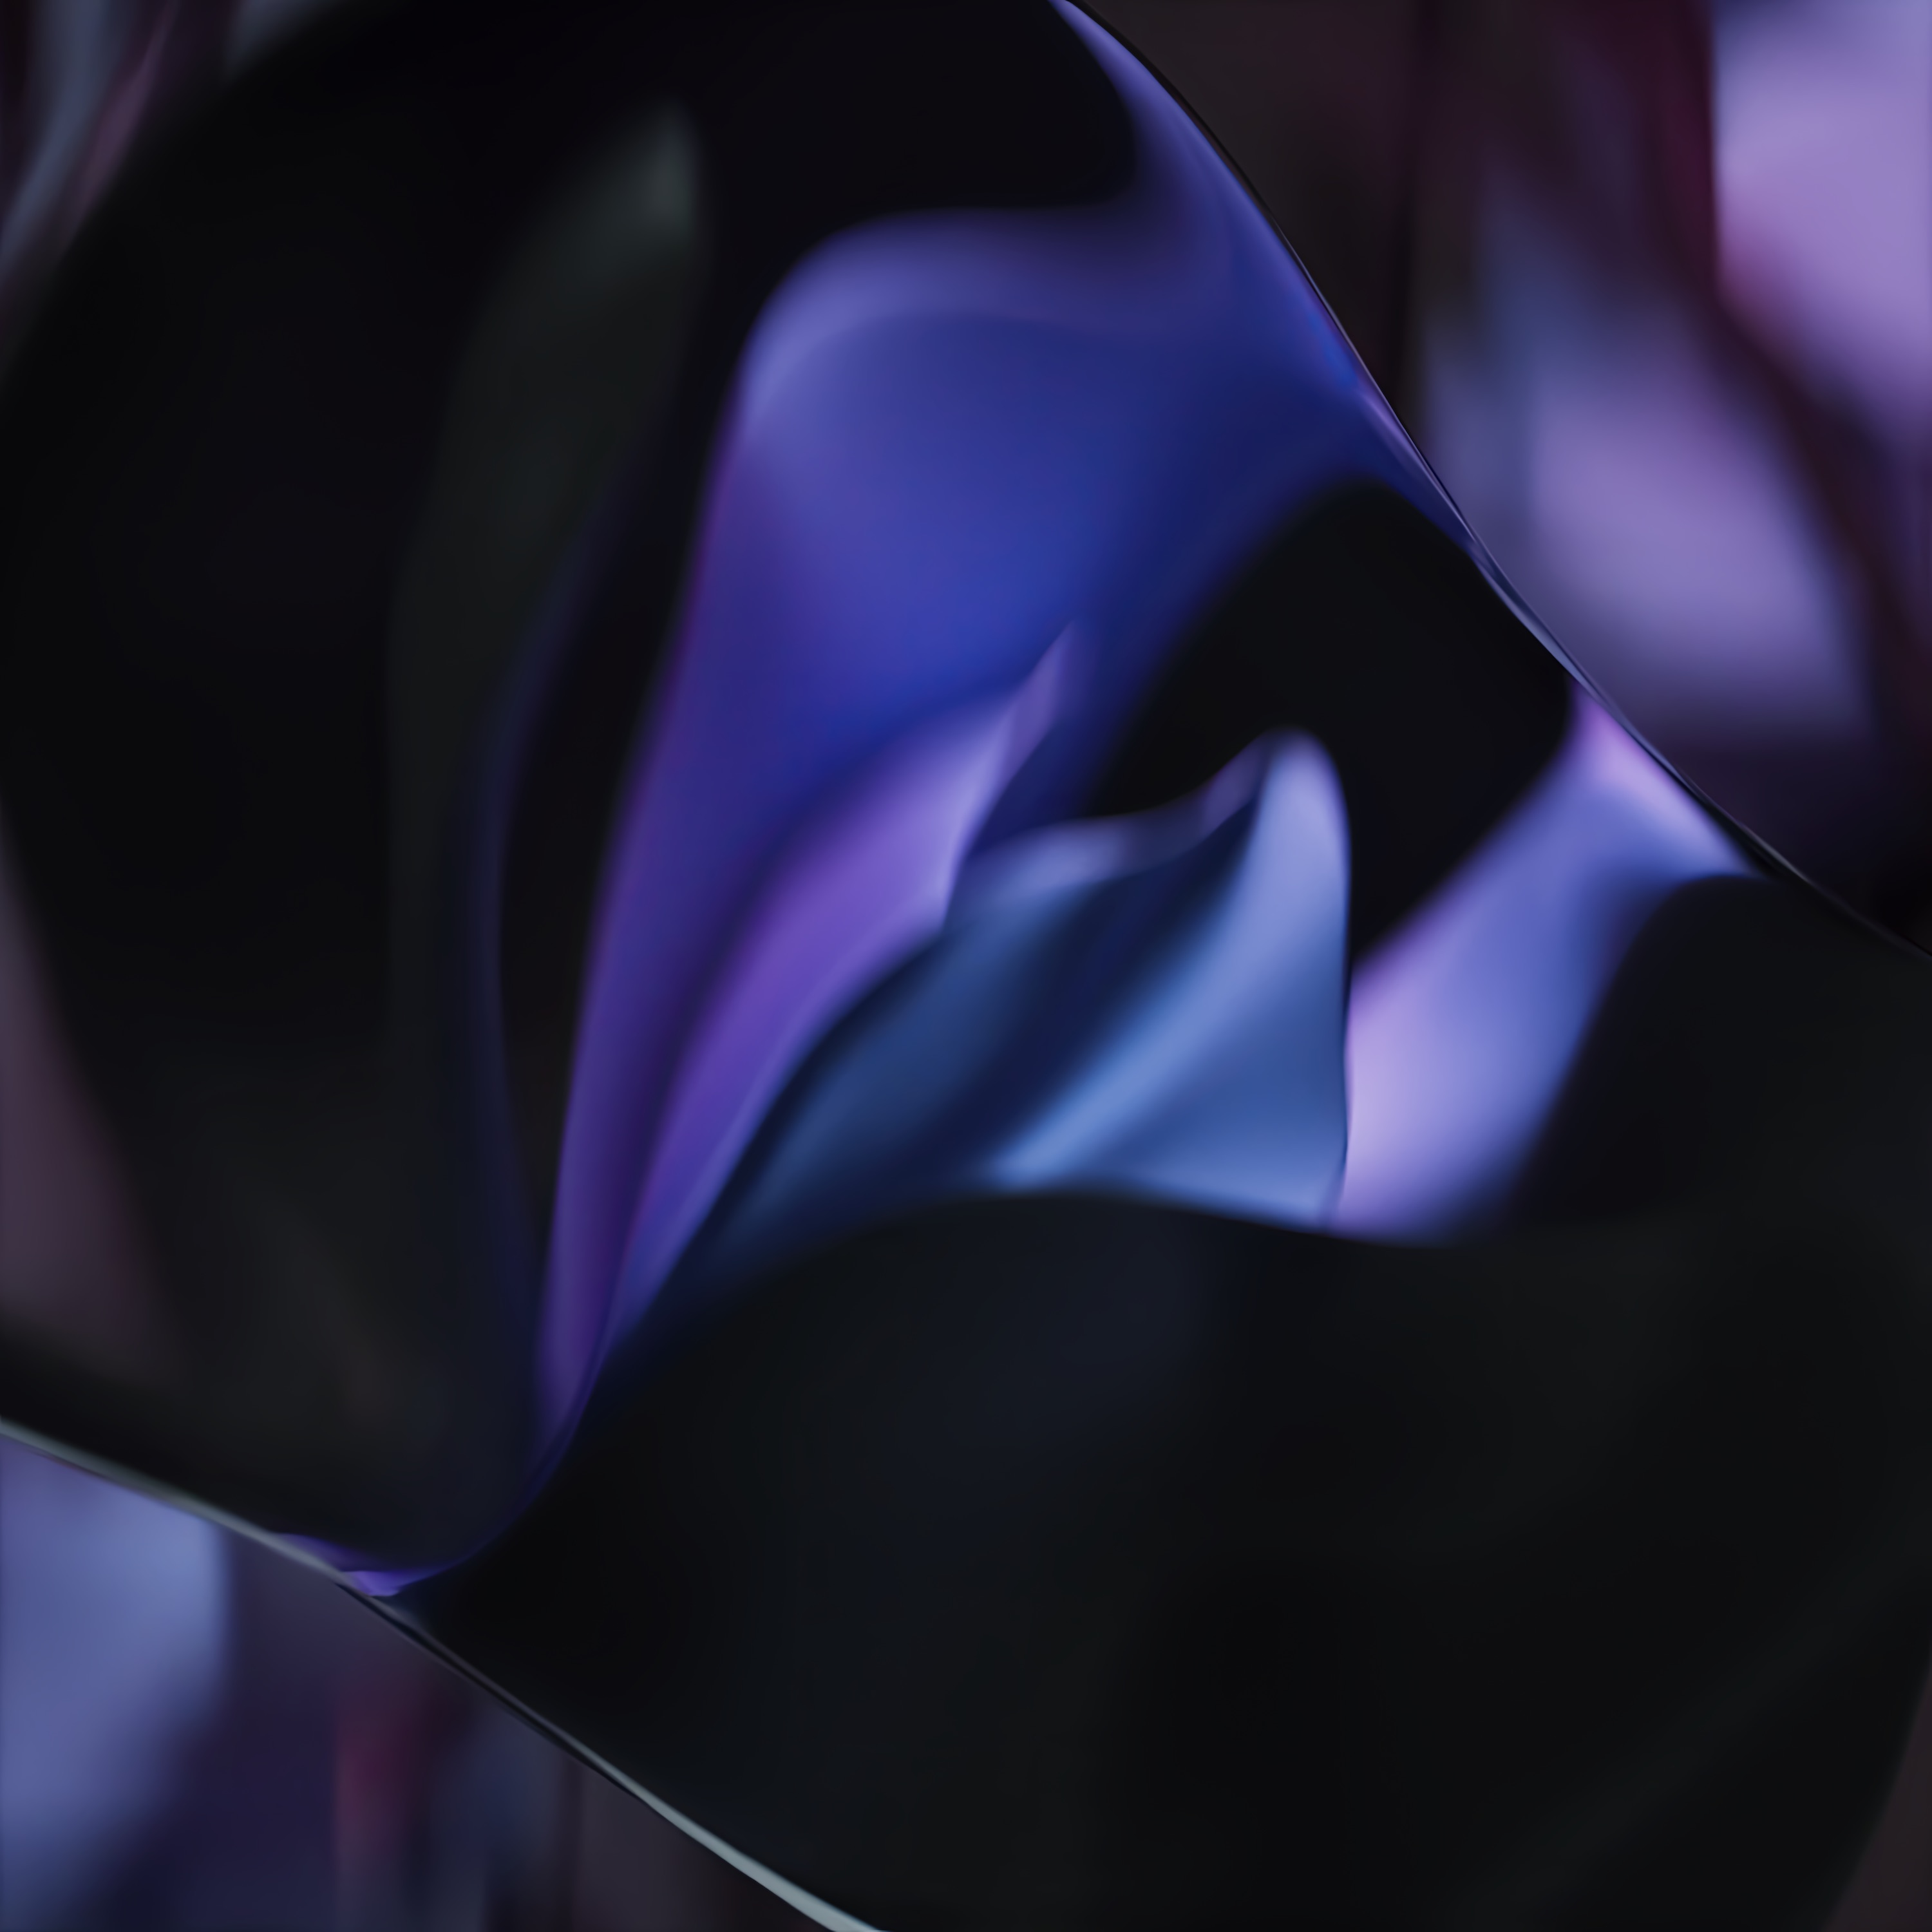![output.png](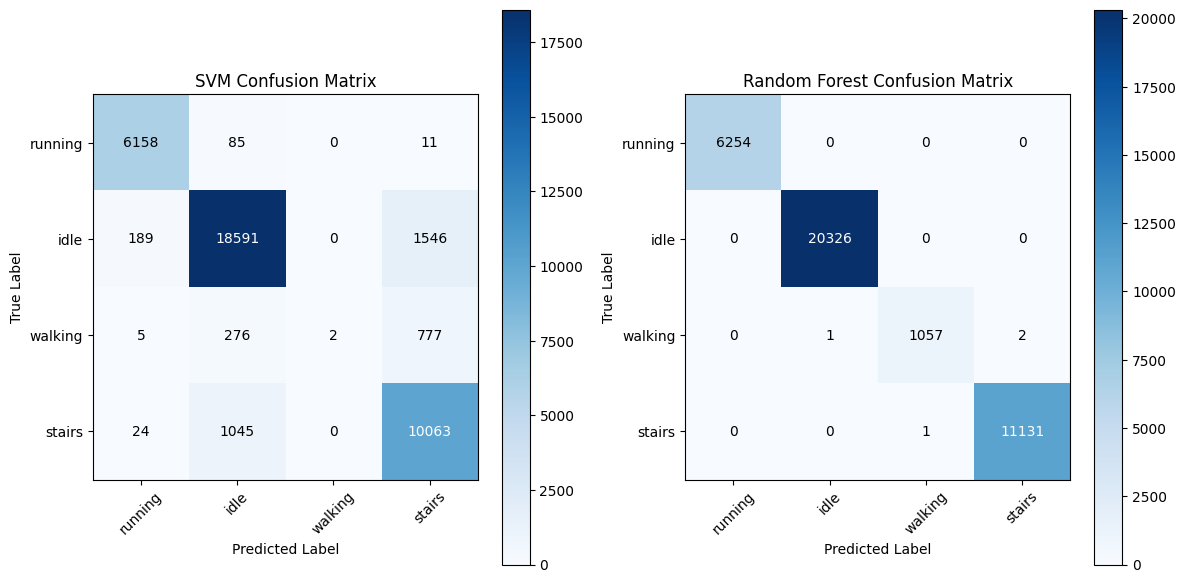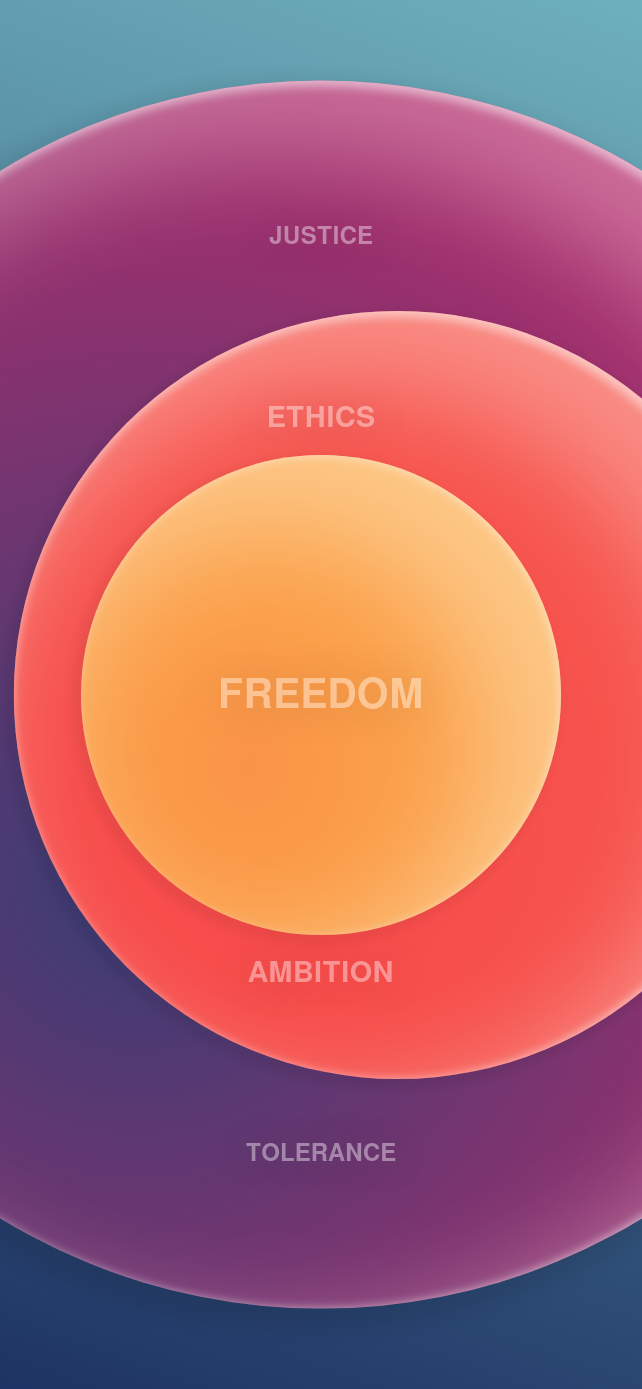)))Colab

In [121]:
filename = 'homework.zip' c
# filename = 'data/homework.zip' # on local PC

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('')
print(f'zipfile {filename} extracted')

df_list = []

for dir_name in os.listdir('data'):
    if not os.path.isdir(f'data/{dir_name}'):
        continue
    else:
        print(f'Working with dir: {dir_name}')
        for file_name in os.listdir(f'data/{dir_name}'):
            if file_name.endswith('.csv'):
                df_csv = pd.read_csv(f'data/{dir_name}/{file_name}')
                df_csv['action'] = dir_name
                df_list.append(df_csv)
        shutil.rmtree(f'data/{dir_name}')

os.rmdir('data') # on Google Colab, on lovcal PC - comment this
df = pd.concat(df_list, ignore_index=True)
df.to_csv('df.csv', index=False) # on Google Colab
# df.to_csv('data/df.csv', index=False) # on local PC
print('df created and saved to df.csv')
df

zipfile homework.zip extracted
Working with dir: running
Working with dir: walking
Working with dir: stairs
Working with dir: idle
df created and saved to df.csv


,accelerometer_X,accelerometer_Y,accelerometer_Z,action
0,2.059013,2.437297,-2.193089,running
1,-3.538630,5.027824,-3.356671,running
2,13.838486,1.484405,-4.965574,running
3,2.130840,-7.785944,-8.920795,running
4,-2.197877,7.000646,6.473922,running
...,...,...,...,...
193855,-1.177947,5.559336,7.431602,idle
193856,-1.561019,5.947197,6.852206,idle
193857,-1.240196,6.454768,6.641516,idle
193858,-0.282516,6.828264,6.785168,idle


In [122]:
df.shape

(193860, 4)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   action           193860 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.9+ MB


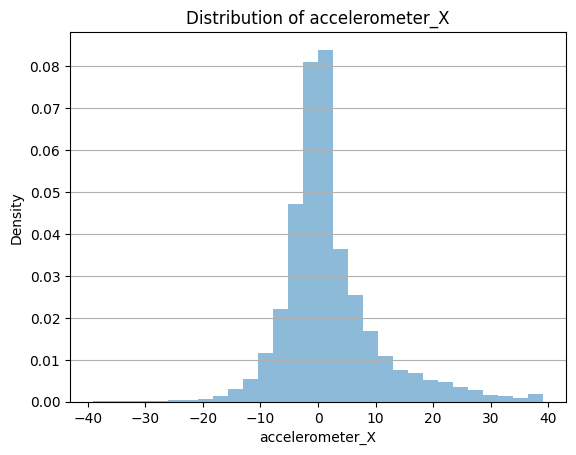

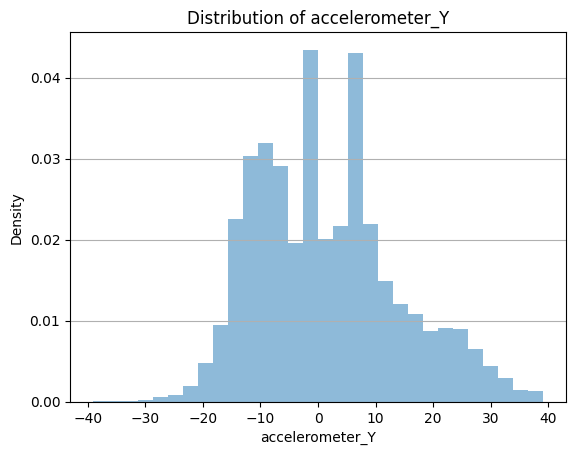

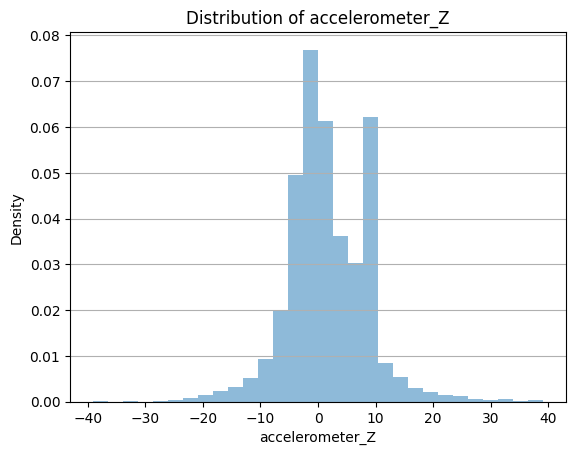

In [124]:
numerical_cols = df.select_dtypes(include=[np.number])

def plot_histograms(dataframe, numerical_columns):
    for col in numerical_columns:
        plt.figure()
        dataframe[col].plot(kind='hist', density=True, alpha=0.5, bins=30)
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'Distribution of {col}')
        plt.grid(axis='y')

plot_histograms(df, numerical_cols.columns)

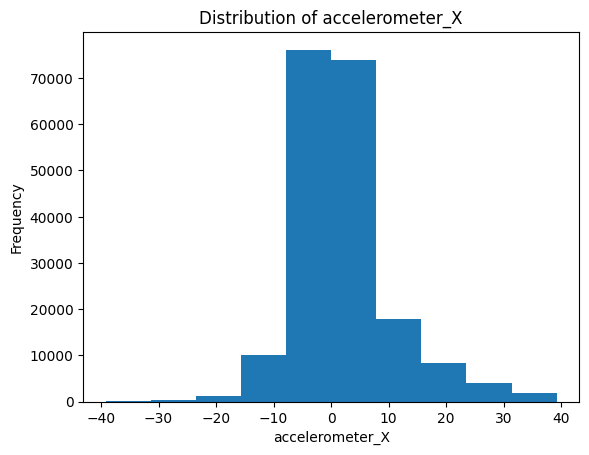

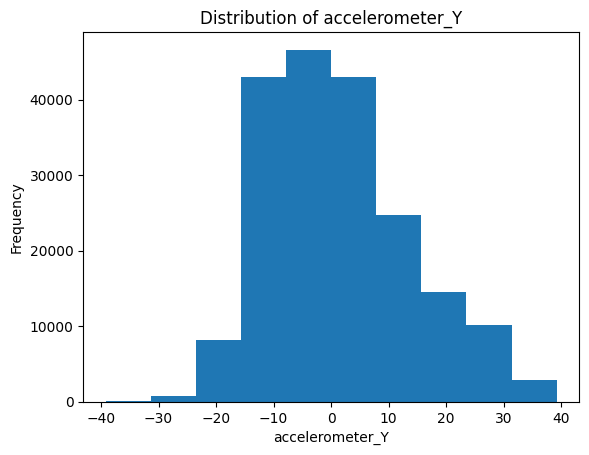

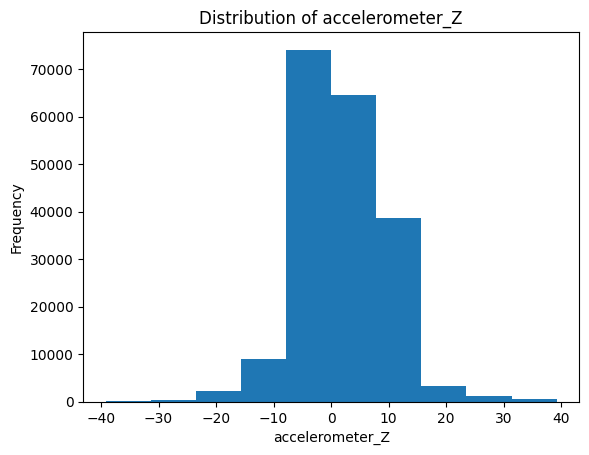

In [125]:
for col in numerical_cols:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

<Figure size 1000x600 with 0 Axes>

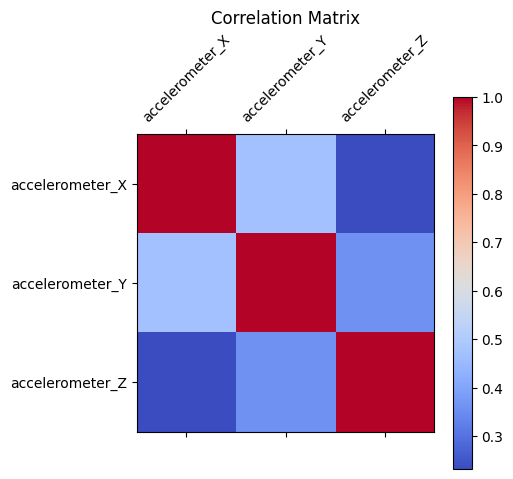

In [126]:
plt.figure(figsize=(10, 6))
correlation_matrix = X.corr()
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

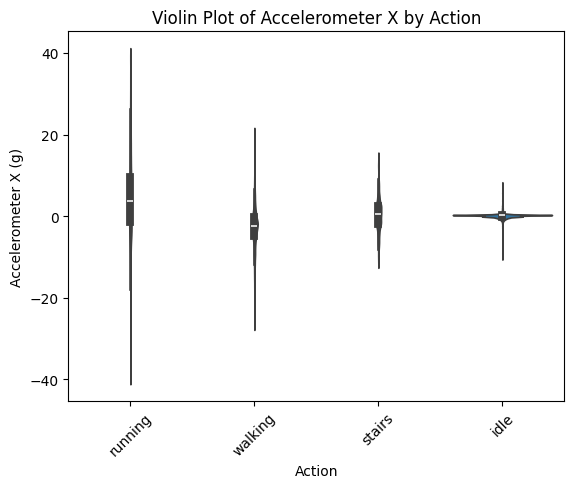

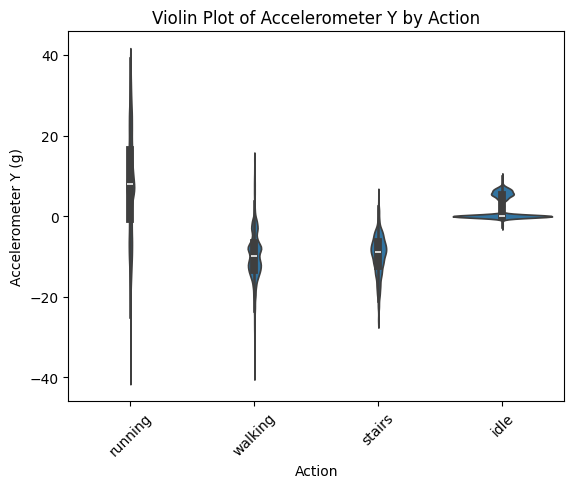

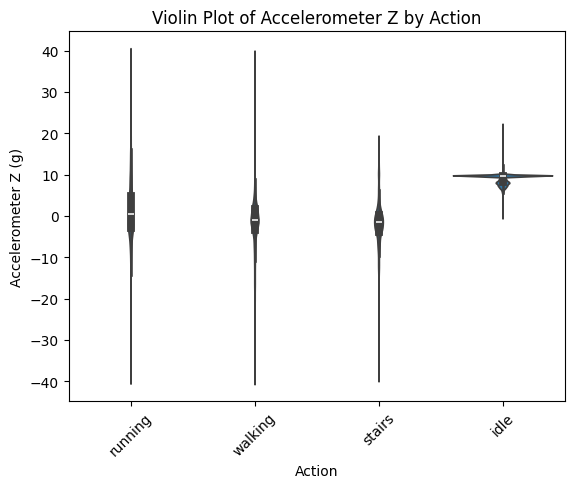

<Figure size 640x480 with 0 Axes>

In [127]:
for axis in ['X', 'Y', 'Z']:
  sns.violinplot(
      x = "action",
      y = f"accelerometer_{axis}",
      data=df
  )
  plt.xlabel("Action")
  plt.ylabel(f"Accelerometer {axis} (g)")
  plt.title(f"Violin Plot of Accelerometer {axis} by Action")
  plt.xticks(rotation=45)
  plt.show()
  plt.clf()

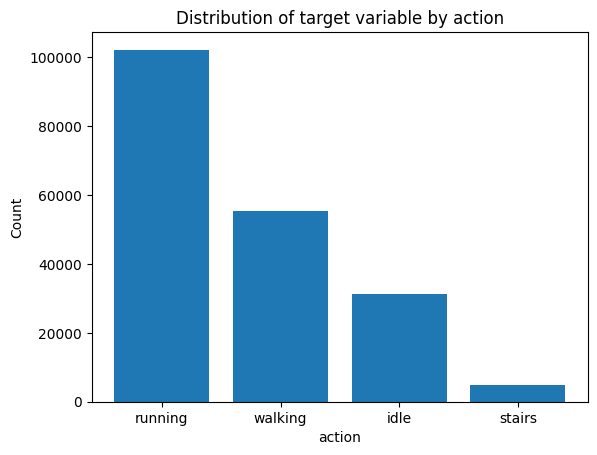

In [128]:
for col in df.select_dtypes(include=[object]):
  plt.figure()
  plt.bar(df[col].value_counts().index, df[col].value_counts().values)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title(f'Distribution of target variable by {col}')
  plt.show()

## Підготовка даних

In [129]:
X = df.drop('action', axis=1)
y = df['action']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [131]:
X_train['time_mean'] = X_train.mean(axis=1)
X_test['time_mean'] = X_test.mean(axis=1)

# Feature Engineering
# See resulls below when all features enabled (uncommented) - numbers and plots
# X_train['std'] = X_train.std(axis=1)
# X_test['std'] = X_test.std(axis=1)
# X_train['min'] = X_train.min(axis=1)
# X_test['min'] = X_test.min(axis=1)
# X_train['max'] = X_train.max(axis=1)
# X_test['max'] = X_test.max(axis=1)
# X_train['median'] = X_train.median(axis=1)
# X_test['median'] = X_test.median(axis=1)

In [132]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.18506748, -0.13126393,  1.10813486,  0.22033991],
       [-3.86652882,  2.02190021,  1.25127162,  0.07789002],
       [-1.33061339, -1.13679083, -0.37582679, -1.29448772],
       ...,
       [-0.32512924, -0.24840897,  0.16476407, -0.21429788],
       [-0.19645461, -0.13203211,  1.10880069,  0.21570202],
       [ 0.26187756,  0.32272111,  0.39711162,  0.41888637]])

## Навчання

In [133]:
%%time
svm_model = SVC()
rf_model = RandomForestClassifier()
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

CPU times: user 8min 2s, sys: 805 ms, total: 8min 3s
Wall time: 8min 13s


RandomForestClassifier()

## Оцінка

In [134]:
%%time
svm_pred = svm_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

CPU times: user 1min 32s, sys: 86.9 ms, total: 1min 32s
Wall time: 1min 35s


In [135]:
%%time
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_report = classification_report(y_test, svm_pred)

rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_report = classification_report(y_test, rf_pred)

print('======================== SVM ========================')
print(f'Accuracy  {svm_accuracy:.4f}')
print(f'Precision {svm_precision:.4f}')
print(f'Recall    {svm_recall:.4f}')
print(f'F1 Score  {svm_f1:.4f}')
print(svm_report)
print()
print('=================== Random Forest =================== ')
print(f'Accuracy  {rf_accuracy:.4f}')
print(f'Precision {rf_precision:.4f}')
print(f'Recall    {rf_recall:.4f}')
print(f'F1 Score  {rf_f1:.4f}')
print(rf_report)

======================== SVM ========================
Accuracy  0.8939
Precision 0.8999
Recall    0.8939
F1 Score  0.8838
              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      6305
     running       0.93      0.90      0.92     20326
      stairs       1.00      0.01      0.01       962
     walking       0.80      0.90      0.85     11179

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.89      0.88     38772


=================== Random Forest =================== 
Accuracy  0.9997
Precision 0.9997
Recall    0.9997
F1 Score  0.9997
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6305
     running       1.00      1.00      1.00     20326
      stairs       1.00      0.99      1.00       962
     walking       1.00      1.00      1.00     11179

    accuracy                           1.00    

### Results when all features enabled (uncommented)
```
======================== SVM ========================
Accuracy  0.8979
Precision 0.9036
Recall    0.8979
F1 Score  0.8864
              precision    recall  f1-score   support

        idle       0.97      0.98      0.98      6254
     running       0.93      0.91      0.92     20326
      stairs       1.00      0.00      0.00      1060
     walking       0.81      0.90      0.86     11132

    accuracy                           0.90     38772
   macro avg       0.93      0.70      0.69     38772
weighted avg       0.90      0.90      0.89     38772


=================== Random Forest ===================
Accuracy  0.9999
Precision 0.9999
Recall    0.9999
F1 Score  0.9999
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6254
     running       1.00      1.00      1.00     20326
      stairs       1.00      1.00      1.00      1060
     walking       1.00      1.00      1.00     11132

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772

```


### Порівняння (графіки)

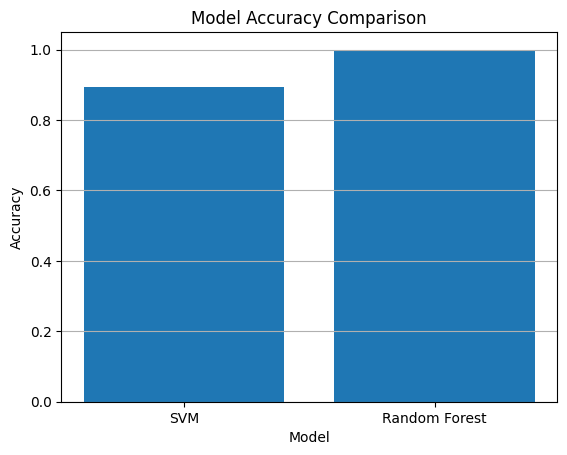

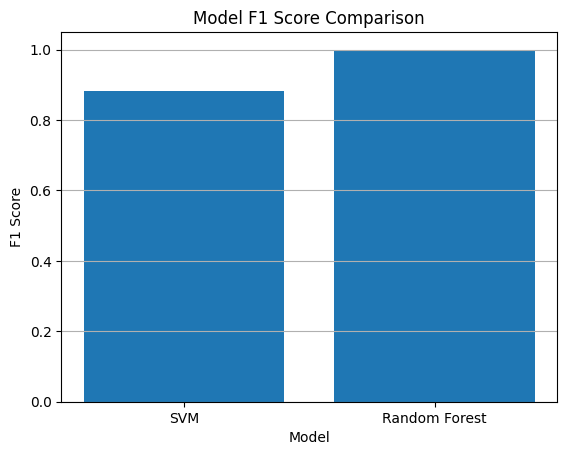

In [136]:
plt.figure()
plt.bar(['SVM', 'Random Forest'], [svm_accuracy, rf_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')
plt.show()

plt.figure()
plt.bar(['SVM', 'Random Forest'], [svm_f1, rf_f1])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.grid(axis='y')
plt.show()

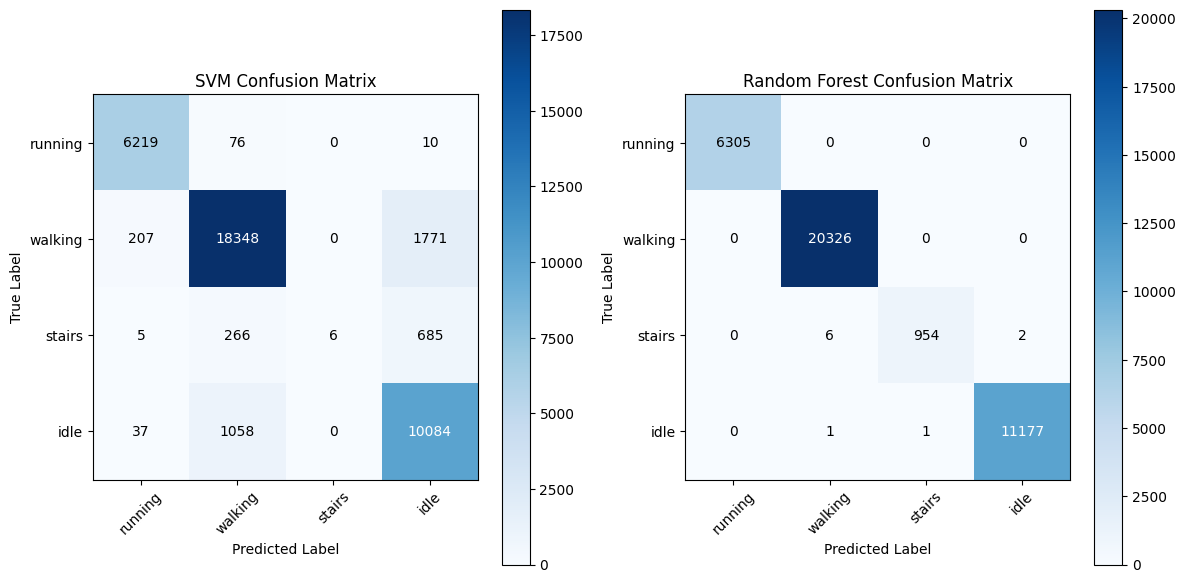

In [137]:
# Confusion matrix for SVM
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
class_names = list(df['action'].unique())
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)

plt.subplot(1, 2, 2)
plt.imshow(rf_cm, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')

thresh = rf_cm.max() / 2.0
for i in range(rf_cm.shape[0]):
    for j in range(rf_cm.shape[1]):
        plt.text(j, i, rf_cm[i, j],
                 ha="center", va="center",
                 color="white" if rf_cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

### Plots Results when all features enabled (uncommented)


![](https://drive.google.com/uc?export=view&id=1Ll9nEbU9Fk3S_nsmVKx46fTL2foG7W7h)
